

#  **EDA**



# **feature selection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard_2023.csv")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

df = pd.read_csv('/content/creditcard_2023.csv')
df.dropna(subset=['Class'], inplace=True)

X = df.drop(columns=['Class'])
y = df['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)

resampled_df.to_csv('/content/balanced_dataset_rus.csv', index=False)


New Class Distribution:
Class
0.0    158022
1.0    158022
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442337 entries, 0 to 442336
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      442337 non-null  int64  
 1   V1      442337 non-null  float64
 2   V2      442337 non-null  float64
 3   V3      442337 non-null  float64
 4   V4      442337 non-null  float64
 5   V5      442337 non-null  float64
 6   V6      442337 non-null  float64
 7   V7      442337 non-null  float64
 8   V8      442337 non-null  float64
 9   V9      442337 non-null  float64
 10  V10     442337 non-null  float64
 11  V11     442337 non-null  float64
 12  V12     442337 non-null  float64
 13  V13     442337 non-null  float64
 14  V14     442337 non-null  float64
 15  V15     442337 non-null  float64
 16  V16     442337 non-null  float64
 17  V17     442337 non-null  float64
 18  V18     442337 non-null  float64
 19  V19     442337 non-null  float64
 20  V20     442337 non-null  float64
 21  V21     442337 

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,...,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000,442337.000000
mean,221168.000000,0.144091,-0.139628,0.194364,-0.209534,0.096264,0.123215,0.139848,-0.039515,0.166678,...,-0.031883,-0.004036,-0.004041,0.037816,-0.017224,-0.020571,-0.060935,-0.030008,12036.259319,0.357243
std,127691.837349,0.980636,0.950813,0.975775,0.977153,0.929933,0.951245,0.946834,0.857775,0.969835,...,0.857984,0.915899,0.910962,1.040385,0.959060,1.024917,0.894187,0.947091,6921.565390,0.479188
min,0.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-39.035243,50.120000,0.000000
25%,110584.000000,-0.408979,-0.548720,-0.379781,-0.852836,-0.170666,-0.265633,-0.055155,-0.194755,-0.314437,...,-0.178559,-0.500424,-0.221140,-0.638307,-0.565205,-0.678656,-0.310466,-0.230431,6050.810000,0.000000
50%,221168.000000,-0.010888,-0.242590,0.196293,-0.313614,0.136760,0.161191,0.321828,-0.127095,0.237853,...,-0.067836,-0.030854,-0.051697,0.050286,-0.020770,-0.038504,-0.200240,-0.038998,12019.300000,0.000000
75%,331752.000000,0.943456,0.122500,0.798653,0.433661,0.466656,0.563994,0.566780,0.002584,0.674097,...,0.077590,0.463318,0.145964,0.778116,0.535033,0.635464,0.129410,0.282054,18036.920000,1.000000
max,442336.000000,2.229046,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,...,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000


In [ ]:
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
Categorical_Features = df.select_dtypes(include=['object']).columns

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Check new class distribution
class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)


New Class Distribution:
Class
0.0    158022
1.0    158022
Name: count, dtype: int64


In [ ]:
print("Missing values", resampled_df.isnull().sum())



Missing values id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


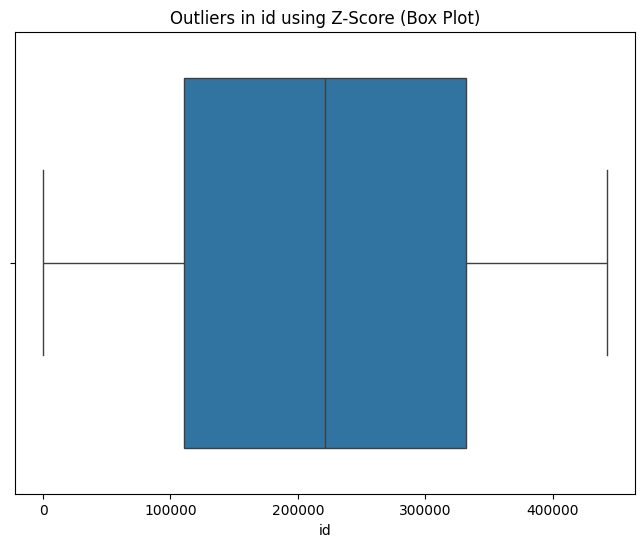

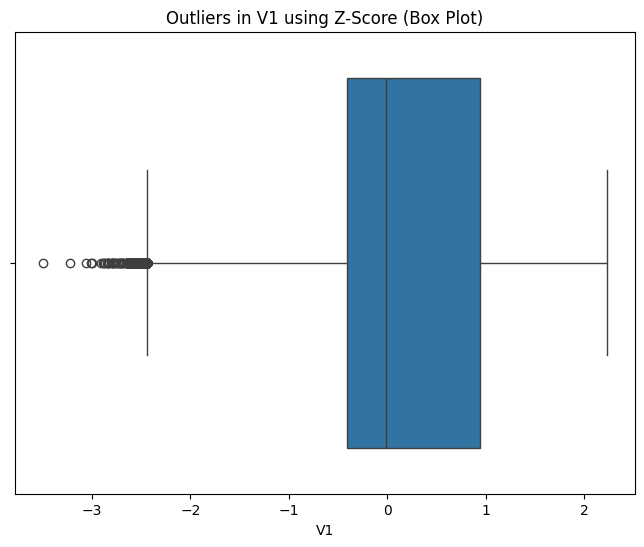

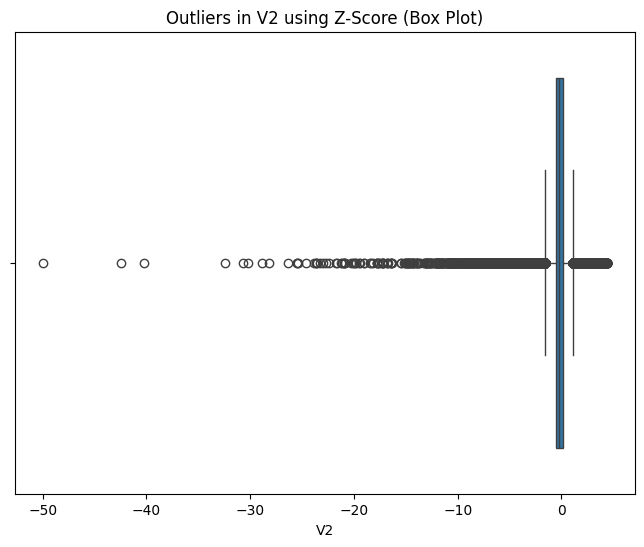

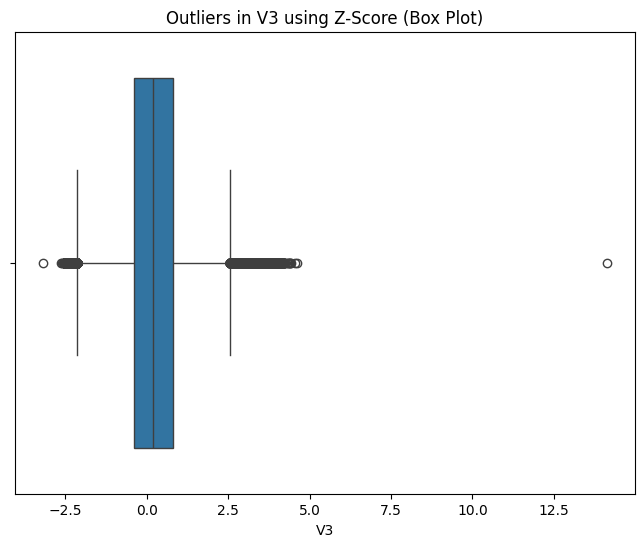

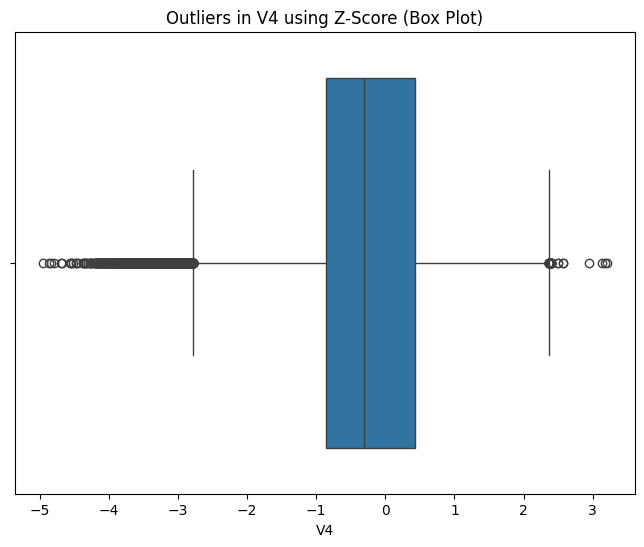

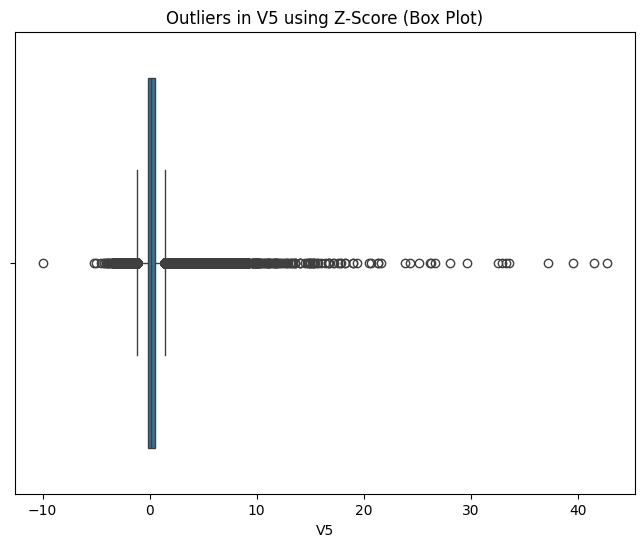

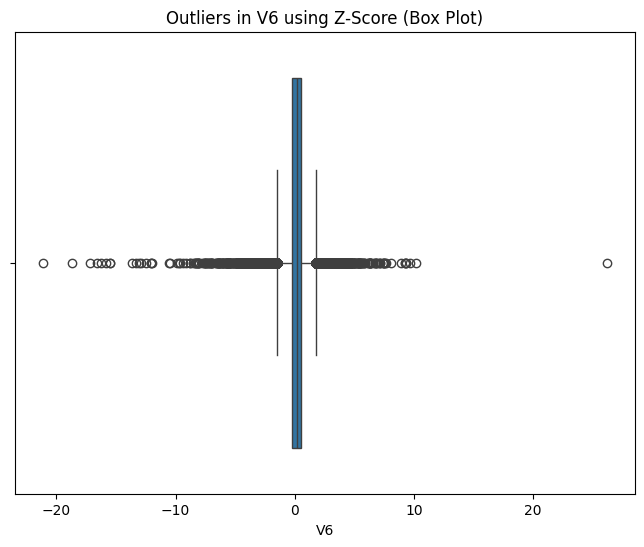

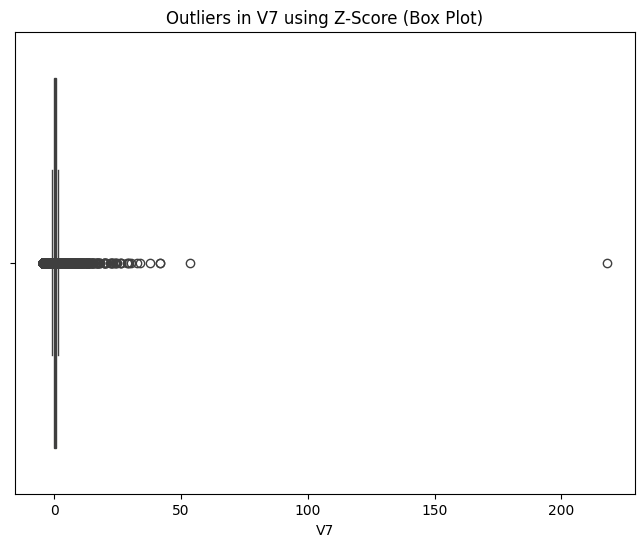

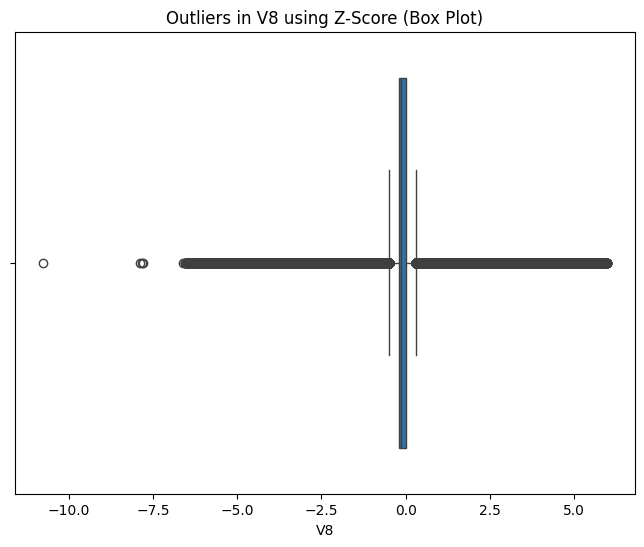

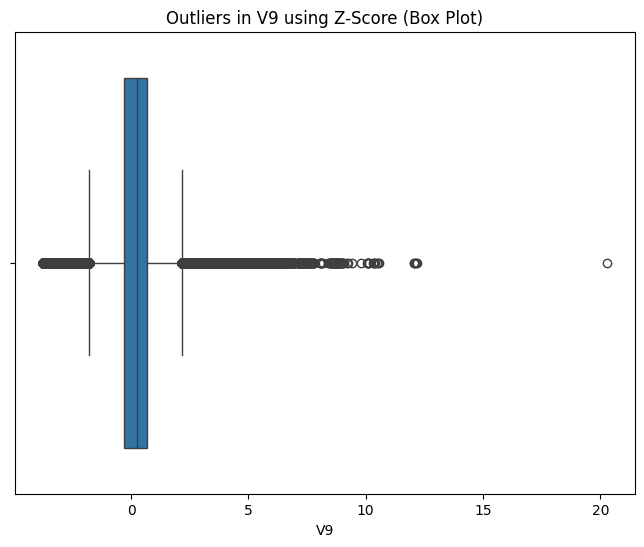

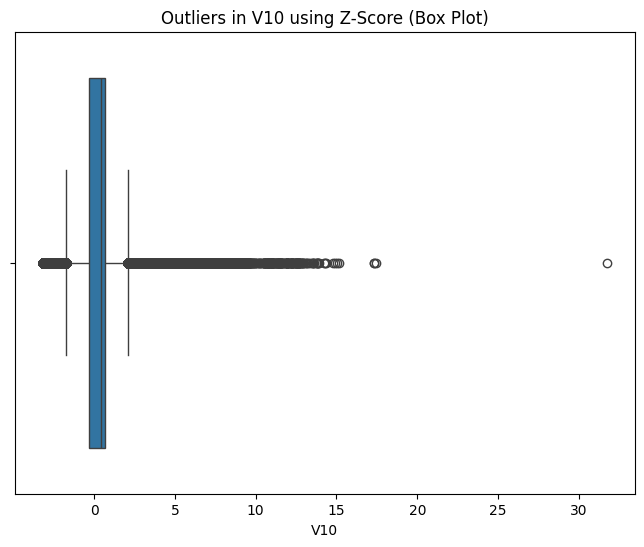

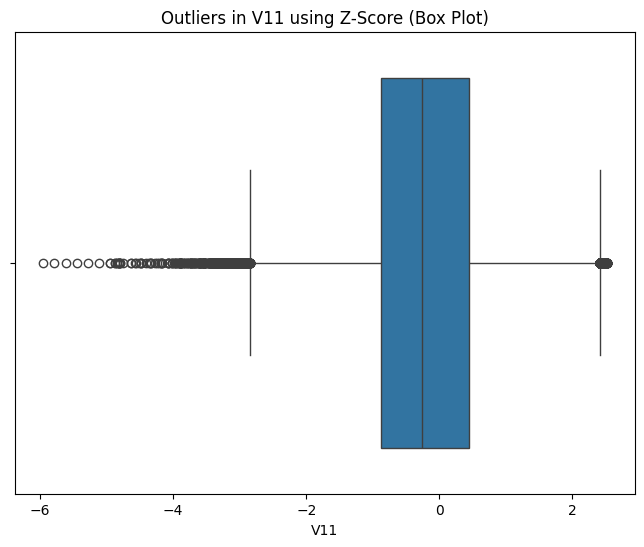

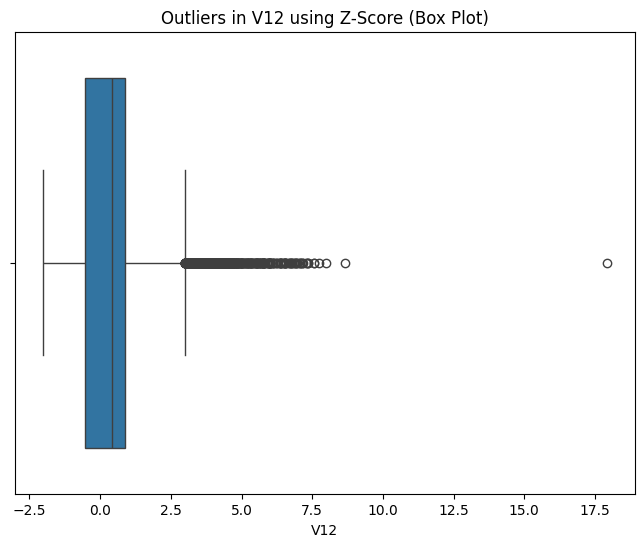

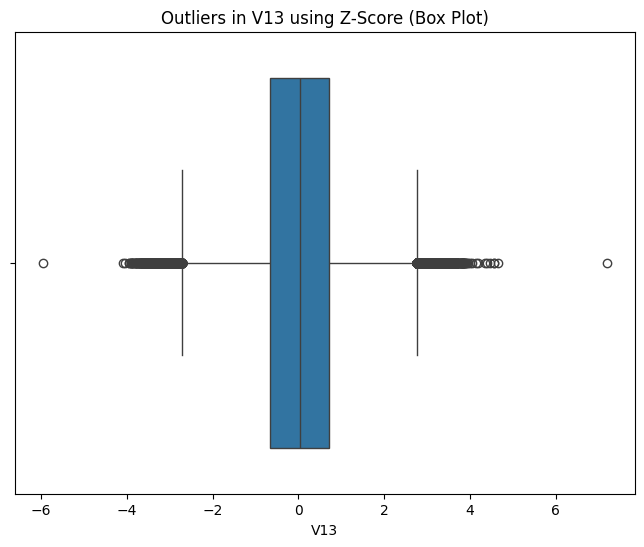

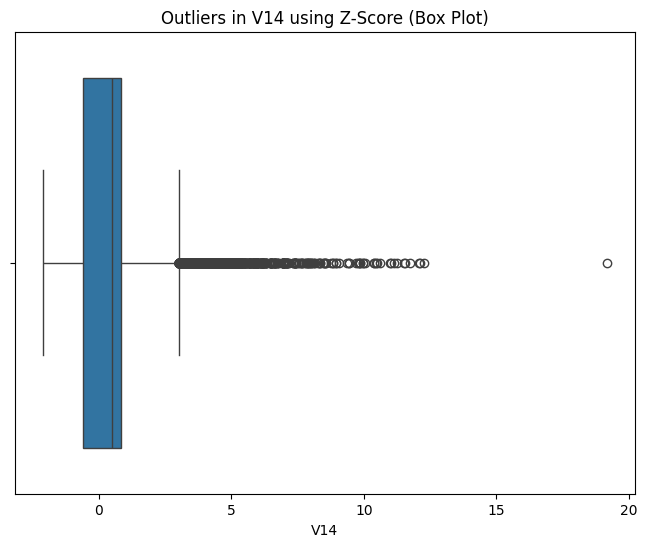

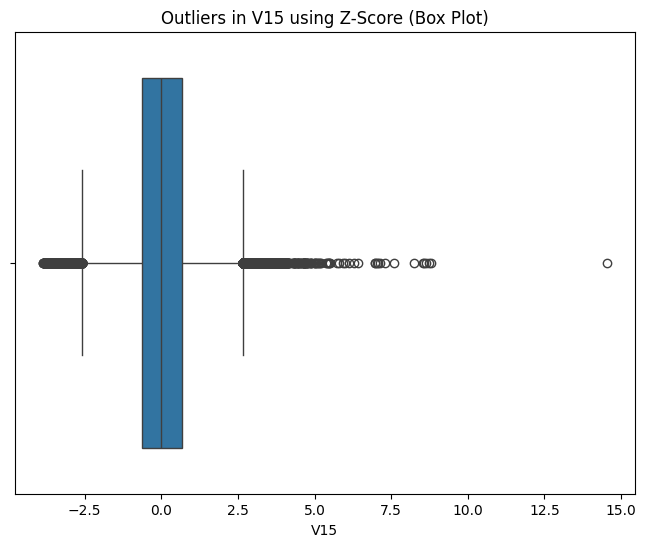

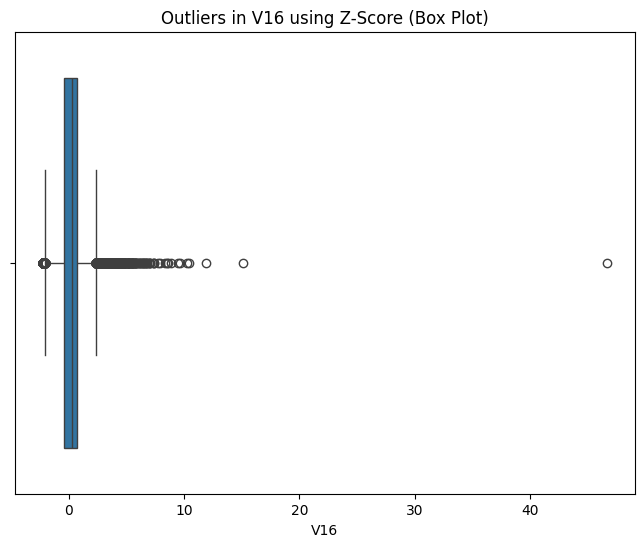

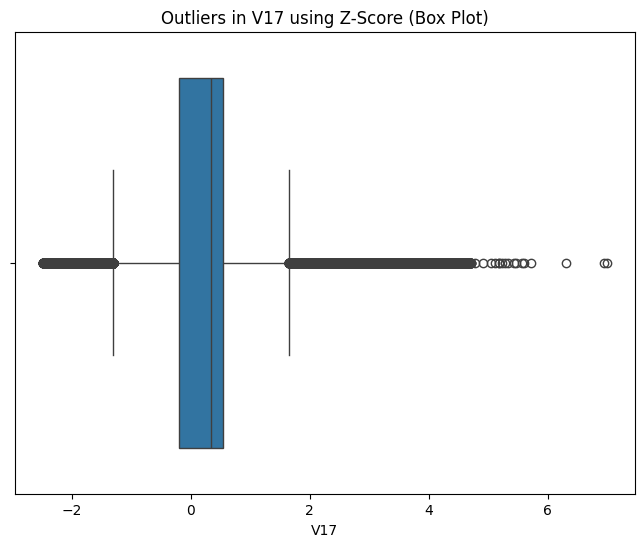

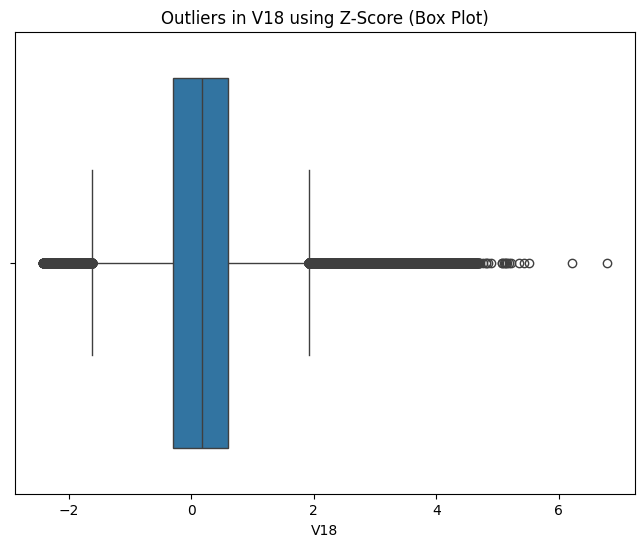

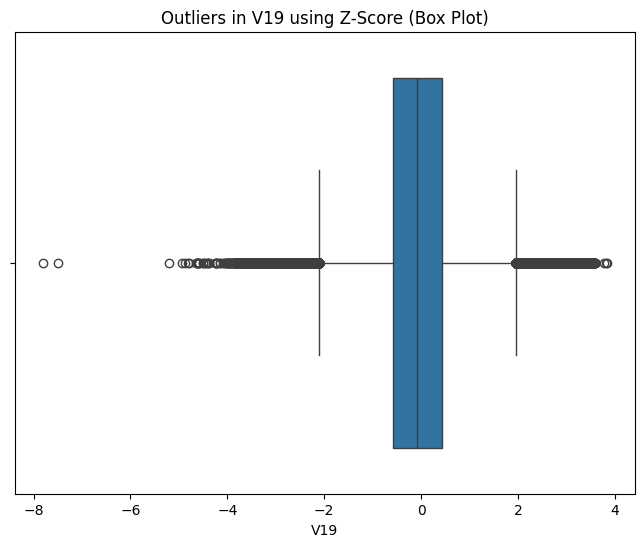

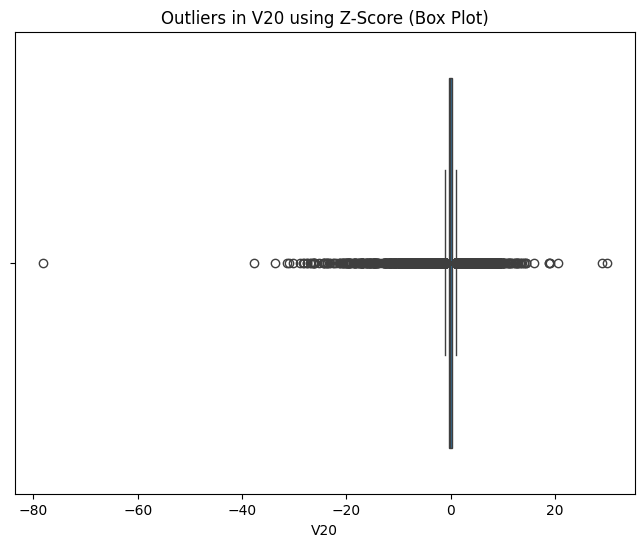

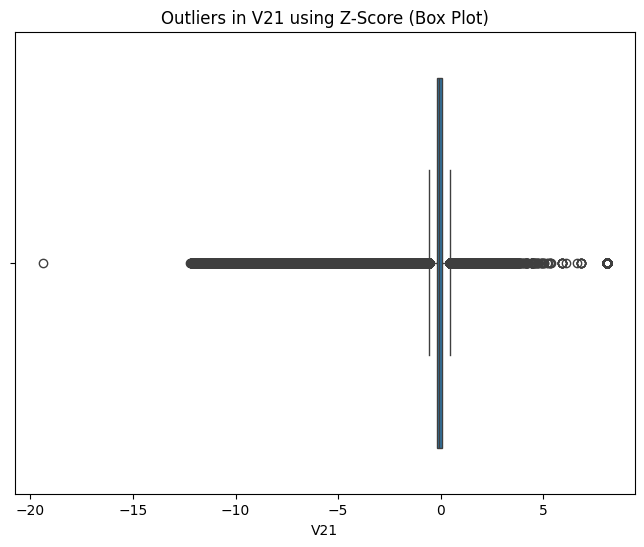

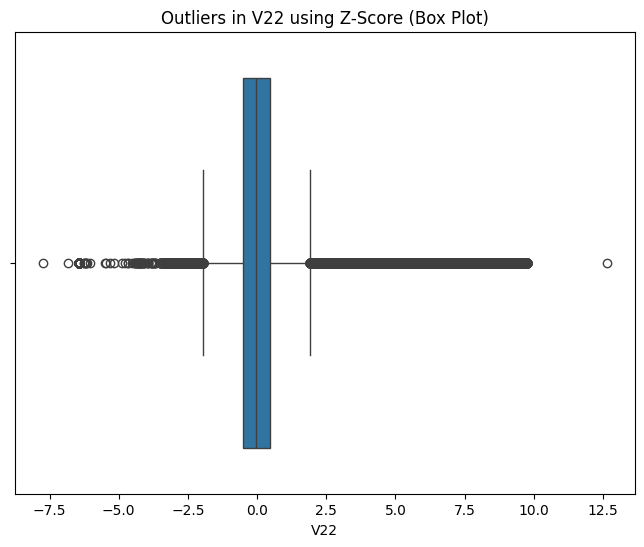

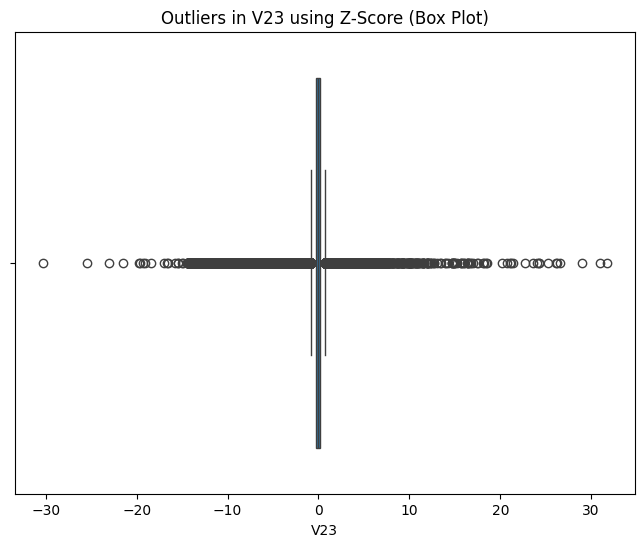

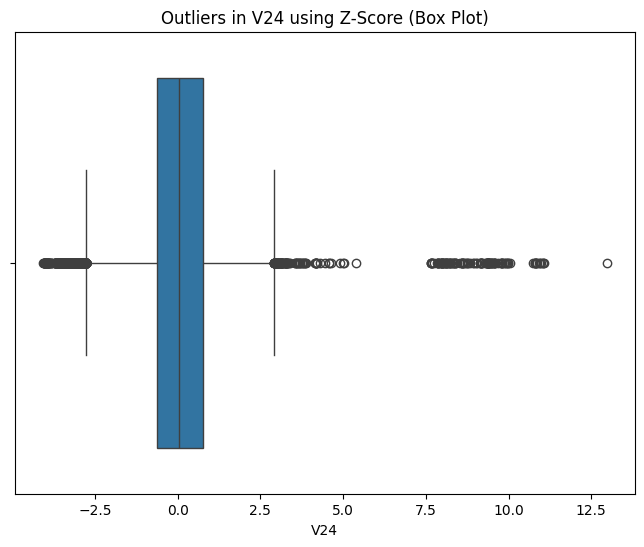

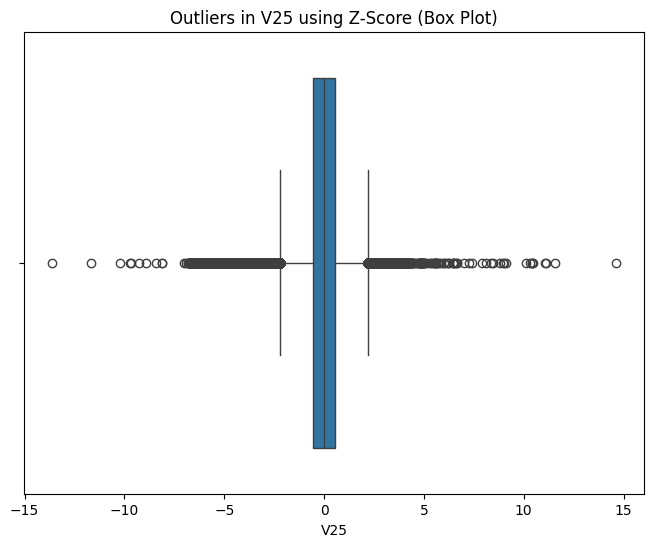

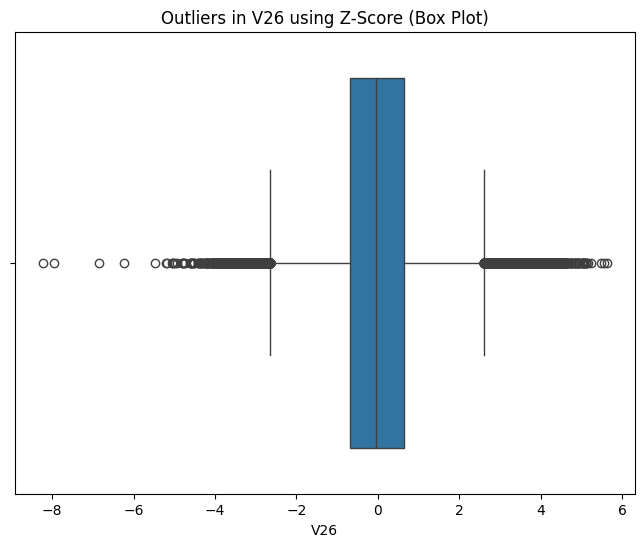

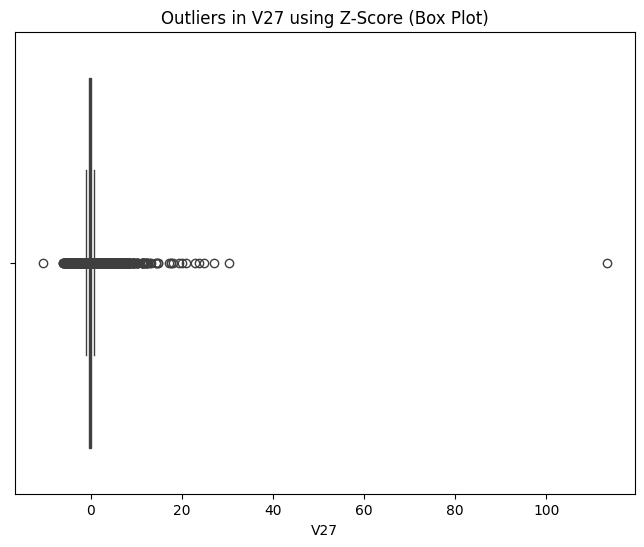

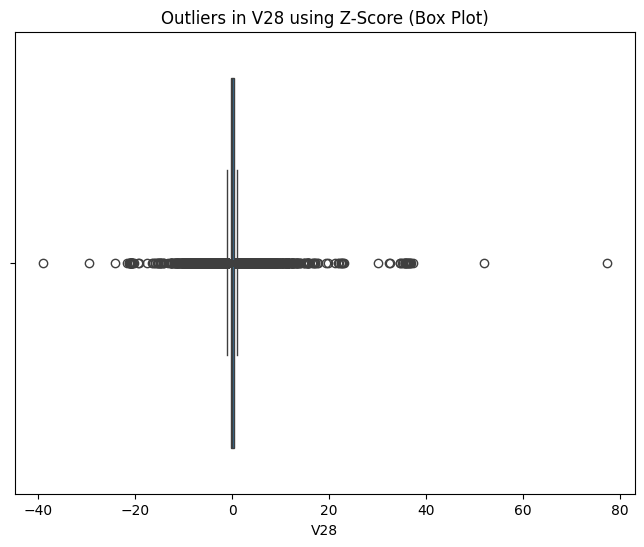

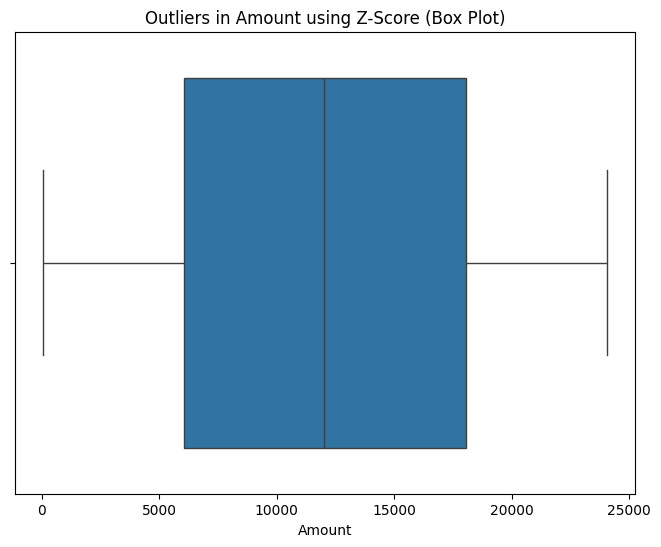

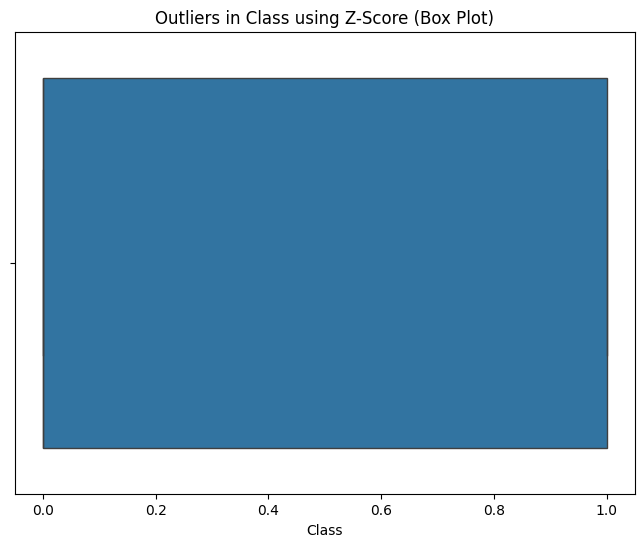

<ipython-input-13-389227ec3d42>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_iqr = resampled_df[(((resampled_df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]


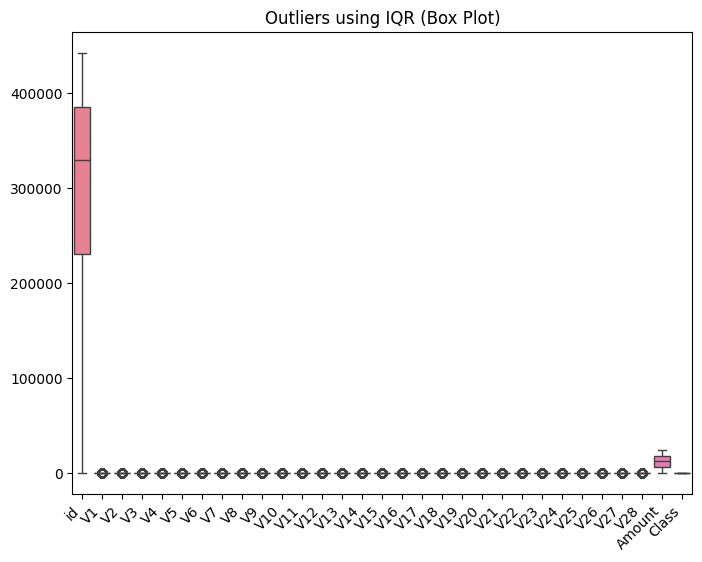

In [ ]:
import numpy as np
for feature in Numerical_Features:
    mean = np.mean(resampled_df[feature])
    std = np.std(resampled_df[feature])
    z_scores = (resampled_df[feature] - mean) / std
    outliers_z = resampled_df[feature][np.abs(z_scores) > 3]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature} using Z-Score (Box Plot)')
    plt.show()

# IQR method
Q1 = resampled_df[Numerical_Features].quantile(0.25)
Q3 = resampled_df[Numerical_Features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = resampled_df[(((resampled_df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers_iqr[Numerical_Features])
plt.title('Outliers using IQR (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X = resampled_df.drop(columns=['Class'])
y = resampled_df['Class']

X_manual = X.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

X_combined = np.hstack((X_scaled, X[['Amount']].values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


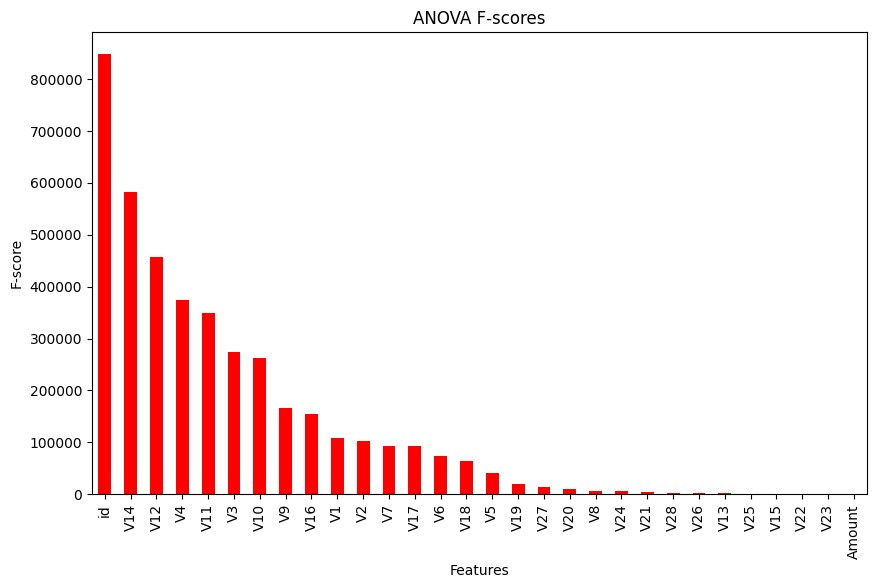

In [ ]:
# ANOVA (F-test)
from sklearn.feature_selection import f_classif
import pandas as pd
import matplotlib.pyplot as plt
feature_names = X.columns
f_scores, _ = f_classif(X, y)
f_scores = pd.Series(f_scores, index=feature_names)
f_scores.sort_values(ascending=False, inplace=True)



# Plot ANOVA F-scores
plt.figure(figsize=(10, 6))
f_scores.plot(kind="bar", color="red")
plt.title("ANOVA F-scores")
plt.xlabel("Features")
plt.ylabel("F-score")
plt.show()

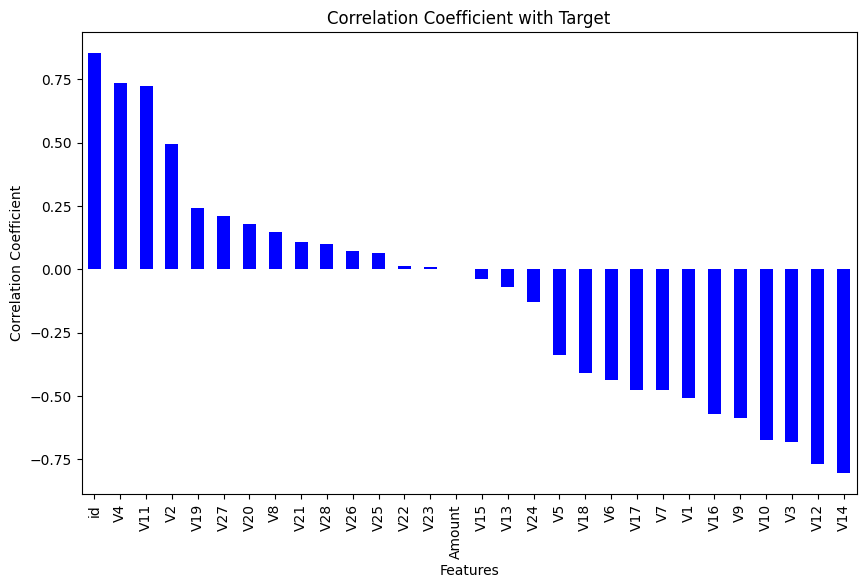

In [ ]:
# Correlation Coefficient
corr_scores = np.corrcoef(X.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index=feature_names)
corr_scores.sort_values(ascending=False, inplace=True)

# Plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# **Logistic**

In [ ]:
logistic_model = LogisticRegression(max_iter=1500)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.9976269202170577


In [ ]:
def evaluate_classification_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

print("Logistic Regression:")
evaluate_classification_model(y_test, y_pred_logistic, "Logistic Regression")

Logistic Regression:
Logistic Regression - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

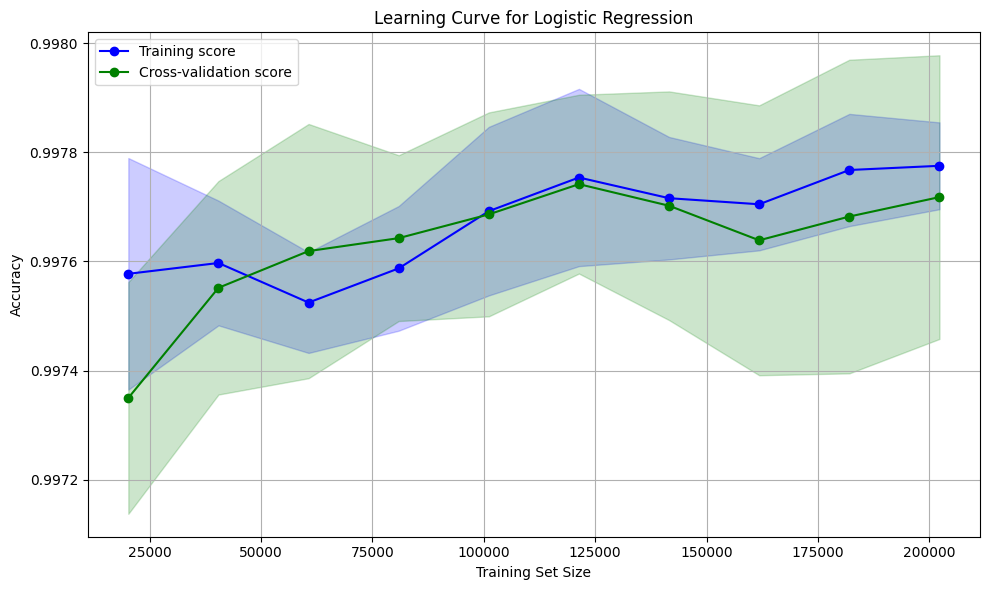

In [ ]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(max_iter=1000, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    log_reg,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_scores_mean, label="Cross-validation score", color="green", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color="green")

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# **pdp**

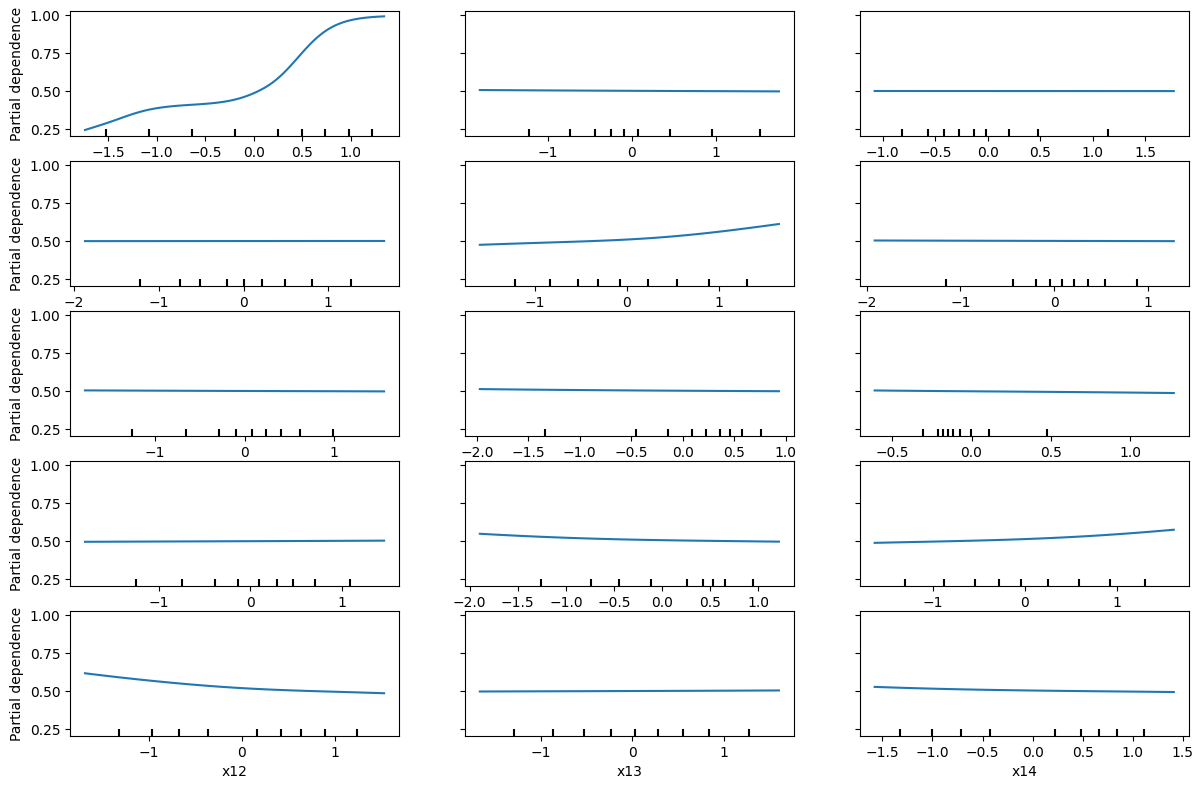

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = list(range(15))
target_class = 1

fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(
    logistic_model,
    X_test,
    features=features,
    target=target_class,
    ax=ax
)

plt.tight_layout()
plt.show()


# **ice**

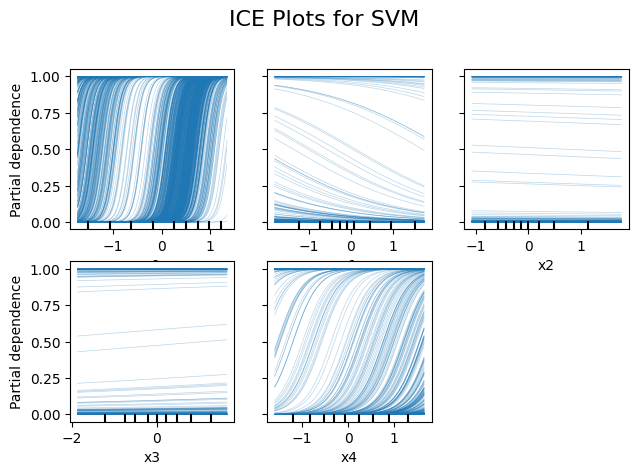

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = list(range(5))
target_class = 1

PartialDependenceDisplay.from_estimator(
    logistic_model,
    X_test,
    features=features,
    target=target_class,
    kind='individual'
)
plt.suptitle("ICE Plots ", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **LIME**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f68aacb8c9dedd61c0591b7757464ee0bd1c66bf503a7948fc734baef9cb0dab
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

feature_names = X.columns
class_names = ['Not Fraud', 'Fraud']

explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True
)
i = 10

exp = explainer.explain_instance(
    X_test[i],
    logistic_model.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_all=False)
print(exp.as_list())

[('id > 0.86', 0.42135730003740224), ('-0.83 < V12 <= 0.16', 0.06134971852508227), ('V17 <= -0.62', 0.04358433607663467), ('-0.66 < V4 <= -0.07', -0.0389231324580731), ('-0.59 < V10 <= 0.26', 0.029644726892142263), ('-0.35 < V20 <= -0.12', -0.024034256409581775), ('-0.12 < V8 <= 0.05', 0.022708979310389635), ('V21 > 0.15', 0.021861816545801632), ('V13 <= -0.70', -0.015018606889407073), ('-0.62 < V15 <= -0.04', 0.01479463426068264)]


  0%|          | 0/50 [00:00<?, ?it/s]

shap_values is an array with shape: (50, 30, 2)
Shape of X_sample: (50, 30)
Shape of shap_values_class1: (50, 30, 2)


<Figure size 640x480 with 0 Axes>

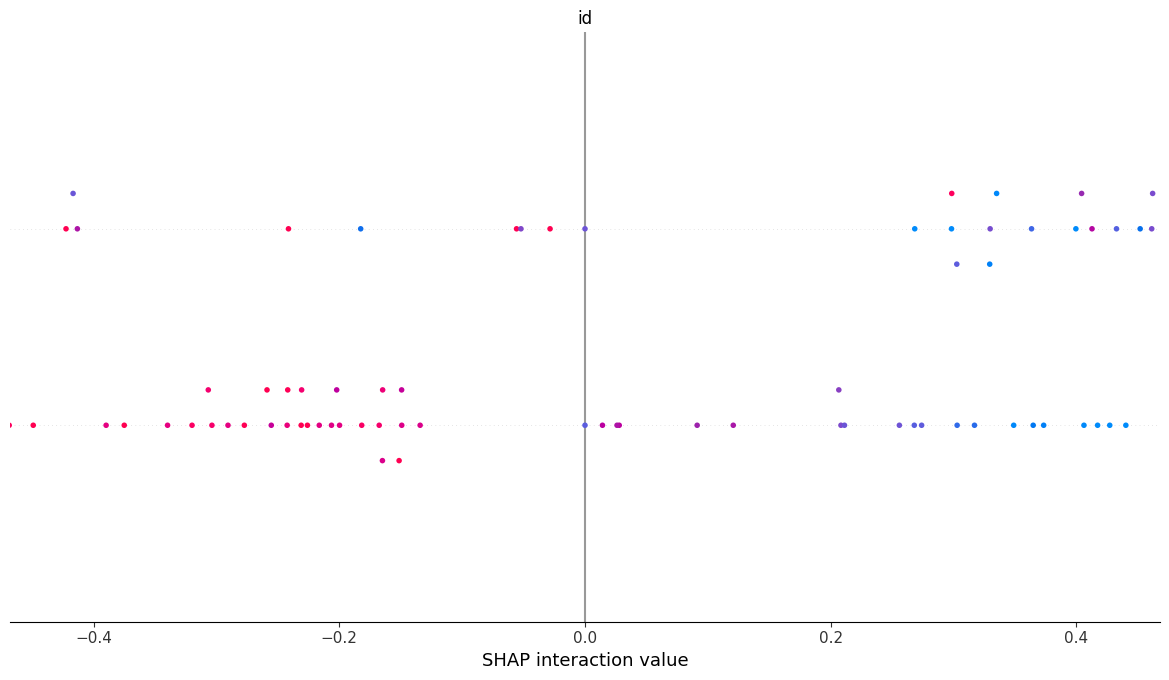

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

explainer = shap.KernelExplainer(logistic_model.predict_proba, shap.sample(X_train, 100))

sample_idx = np.random.choice(len(X_test), 50, replace=False)
X_sample = X_test[sample_idx]

shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    print(f"shap_values is a list with {len(shap_values)} elements.")
    shap_values_class1 = shap_values[1]
else:
    print(f"shap_values is an array with shape: {shap_values.shape}")
    shap_values_class1 = shap_values

print(f"Shape of X_sample: {X_sample.shape}")
print(f"Shape of shap_values_class1: {shap_values_class1.shape}")

if shap_values_class1.shape[0] != X_sample.shape[0]:
    print("Shape mismatch: Adjusting the number of samples")
    shap_values_class1 = shap_values_class1[:X_sample.shape[0]]

shap.summary_plot(shap_values_class1, X_sample, feature_names=X.columns.tolist())
